# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

***Load datasets and explore***

In [ ]:
loans_test = pd.read_csv("./data/raw_data/loans_test.csv")
loans_train = pd.read_csv("./data/raw_data/loans_train.csv")
loans_valid = pd.read_csv("./data/raw_data/loans_valid.csv")

# check data columns
# Correct dataset mapping
cols_train = set(loans_train.columns)  # Training set
cols_valid = set(loans_valid.columns)  # Validation set
cols_test  = set(loans_test.columns)   # Test set

common_cols = cols_train & cols_valid & cols_test
only_train  = cols_train - common_cols
only_valid  = cols_valid - common_cols
only_test   = cols_test  - common_cols
uncommon    = (cols_train | cols_valid | cols_test) - common_cols

print("Number of common columns:", len(common_cols))
print("\nColumns only in train:", sorted(list(only_train)))
print("Columns only in valid:", sorted(list(only_valid)))
print("Columns only in test:", sorted(list(only_test)))
print("\nAll uncommon columns:", sorted(list(uncommon)))


Number of common columns: 143

Columns only in train: ['index', 'target']
Columns only in valid: ['index', 'target']
Columns only in test: ['Id']

All uncommon columns: ['Id', 'index', 'target']


In [ ]:
# 创建LoanID列 - 修复数据标识符问题
print("=== 创建LoanID列 ===")

# 使用原始列值创建唯一ID，避免index重复问题
loans_train["LoanID"] = loans_train["index"]
loans_valid["LoanID"] = loans_valid["index"]  
loans_test["LoanID"] = loans_test["Id"]  # 测试集使用Id列

print(f"训练集LoanID范围: {loans_train['LoanID'].min()} - {loans_train['LoanID'].max()}")
print(f"验证集LoanID范围: {loans_valid['LoanID'].min()} - {loans_valid['LoanID'].max()}")
print(f"测试集LoanID范围: {loans_test['LoanID'].min()} - {loans_test['LoanID'].max()}")

# 验证LoanID唯一性
print(f"\nLoanID唯一性检查:")
print(f"训练集: {loans_train['LoanID'].nunique()} / {len(loans_train)} (应该相等)")
print(f"验证集: {loans_valid['LoanID'].nunique()} / {len(loans_valid)} (应该相等)")
print(f"测试集: {loans_test['LoanID'].nunique()} / {len(loans_test)} (应该相等)")


=== 创建LoanID列 ===
训练集LoanID范围: 0 - 49299
验证集LoanID范围: 2 - 49297
测试集LoanID范围: 0 - 13425

LoanID唯一性检查:
训练集: 30504 / 30504 (应该相等)
验证集: 5370 / 5370 (应该相等)
测试集: 13426 / 13426 (应该相等)


- train set(target=0)
- valid,test set(target=0,1)

In [ ]:
loans_train.describe()

,index,target,CreditScore,FirstPaymentDate,MaturityDate,MSA,MI_Pct,NumberOfUnits,OriginalCLTV,OriginalDTI,...,12_RemainingMonthsToLegalMaturity,13_CurrentActualUPB,13_CurrentInterestRate,13_CurrentNonInterestBearingUPB,13_EstimatedLTV,13_InterestBearingUPB,13_LoanAge,13_MonthlyReportingPeriod,13_RemainingMonthsToLegalMaturity,LoanID
count,30504.000000,30504.0,30504.000000,30504.000000,30504.000000,27082.000000,30504.000000,30504.000000,30504.000000,30504.000000,...,30504.000000,3.050400e+04,30504.000000,30504.0,30504.000000,3.050400e+04,30504.000000,30504.0,30504.000000,30504.000000
mean,24704.463808,0.0,753.556189,202402.990362,205311.436074,29470.207592,9.712005,1.030094,75.425125,37.833104,...,337.124803,3.024334e+05,6.720708,0.0,129.553731,3.024334e+05,13.009605,202503.0,336.124803,24704.463808
std,14263.933226,0.0,156.046939,0.097701,353.664552,11107.002689,13.219152,0.221339,19.579456,10.821587,...,42.438443,1.785464e+05,0.551169,0.0,233.278471,1.785464e+05,0.097536,0.0,42.438443,14263.933226
min,0.000000,0.0,600.000000,202402.000000,203103.000000,10180.000000,0.000000,1.000000,6.000000,2.000000,...,73.000000,0.000000e+00,2.500000,0.0,1.000000,0.000000e+00,13.000000,202503.0,72.000000,0.000000
25%,12386.750000,0.0,723.000000,202403.000000,205402.000000,19124.000000,0.000000,1.000000,66.000000,32.000000,...,348.000000,1.710751e+05,6.375000,0.0,59.000000,1.710751e+05,13.000000,202503.0,347.000000,12386.750000
50%,24762.500000,0.0,760.000000,202403.000000,205402.000000,29820.000000,0.000000,1.000000,80.000000,40.000000,...,348.000000,2.653296e+05,6.625000,0.0,73.000000,2.653296e+05,13.000000,202503.0,347.000000,24762.500000
75%,37083.500000,0.0,786.000000,202403.000000,205402.000000,38860.000000,25.000000,1.000000,90.000000,45.000000,...,348.000000,3.967082e+05,7.000000,0.0,85.000000,3.967082e+05,13.000000,202503.0,347.000000,37083.500000
max,49299.000000,0.0,9999.000000,202403.000000,205402.000000,49740.000000,35.000000,4.000000,105.000000,999.000000,...,348.000000,1.677850e+06,9.125000,0.0,999.000000,1.677850e+06,14.000000,202503.0,347.000000,49299.000000


In [ ]:
loans_train.columns.tolist()

['index',
 'target',
 'CreditScore',
 'FirstPaymentDate',
 'FirstTimeHomebuyerFlag',
 'MaturityDate',
 'MSA',
 'MI_Pct',
 'NumberOfUnits',
 'OccupancyStatus',
 'OriginalCLTV',
 'OriginalDTI',
 'OriginalUPB',
 'OriginalLTV',
 'OriginalInterestRate',
 'Channel',
 'PPM_Flag',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanPurpose',
 'OriginalLoanTerm',
 'NumberOfBorrowers',
 'SellerName',
 'ServicerName',
 'SuperConformingFlag',
 'PreHARP_Flag',
 'ProgramIndicator',
 'ReliefRefinanceIndicator',
 'PropertyValMethod',
 'InterestOnlyFlag',
 'BalloonIndicator',
 '0_CurrentActualUPB',
 '0_CurrentInterestRate',
 '0_CurrentNonInterestBearingUPB',
 '0_EstimatedLTV',
 '0_InterestBearingUPB',
 '0_LoanAge',
 '0_MonthlyReportingPeriod',
 '0_RemainingMonthsToLegalMaturity',
 '1_CurrentActualUPB',
 '1_CurrentInterestRate',
 '1_CurrentNonInterestBearingUPB',
 '1_EstimatedLTV',
 '1_InterestBearingUPB',
 '1_LoanAge',
 '1_MonthlyReportingPeriod',
 '1_RemainingMonthsToLegalMaturity'

***Drop columns with 100% missing data***

In [ ]:
# Comprehensive analysis of data vacancy

# 1. Overall missing data summary
missing_summary = loans_train.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_summary / len(loans_train)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Missing_Percentage': missing_pct
})

print(f"Total features: {len(loans_train.columns)}")
print(f"Features with missing data: {(missing_summary > 0).sum()}")
print(f"Features with complete data: {(missing_summary == 0).sum()}")

# Show top 20 features with most missing data
print("Top 20 features with most missing data:")
print(missing_df.head(5).to_string())


Total features: 146
Features with missing data: 4
Features with complete data: 142
Top 20 features with most missing data:
                          Missing_Count  Missing_Percentage
PreHARP_Flag                      30504          100.000000
ReliefRefinanceIndicator          30504          100.000000
SuperConformingFlag               30176           98.924731
MSA                                3422           11.218201
target                                0            0.000000


In [ ]:
# Drop columns with 100% missing data directly
columns_to_drop = ['ReliefRefinanceIndicator', 'PreHARP_Flag']

# Drop columns directly from original datasets
loans_train.drop(columns=columns_to_drop, inplace=True)
loans_valid.drop(columns=columns_to_drop, inplace=True)
loans_test.drop(columns=columns_to_drop, inplace=True)

## Cleaning Data

In [ ]:
# === Display Data Types for All Datasets ===
import pandas as pd
import numpy as np

# Display data types for each dataset
# datasets = {'Train': loans_train, 'Valid': loans_valid, 'Test': loans_test}
datasets = {'Train': loans_train}
for name, df in datasets.items():
    print(f"\n=== {name} Dataset ===")
    print(f"Shape: {df.shape}")
    print(f"Total columns: {len(df.columns)}")
    
    # Show data types summary
    print(f"\nData types summary:")
    print(df.dtypes.value_counts())
    
    # Show detailed column information
    print(f"\nAll columns with data types:")
    print("-" * 80)
    for i, (col, dtype) in enumerate(df.dtypes.items(), 1):
        non_null_count = df[col].count()
        null_count = len(df) - non_null_count
        print(f"{i:3d}. {col:<50} | {str(dtype):<15} | Non-null: {non_null_count:5d} | Null: {null_count:5d}")
    
    # Check for problematic data types
    object_cols = df.select_dtypes(include=['object', 'category']).columns
    datetime_cols = df.select_dtypes(include=['datetime64']).columns
    
    if len(object_cols) > 0:
        print(f"\n⚠️  Object/Categorical columns ({len(object_cols)}):")
        for col in object_cols:
            print(f"  - {col}: {df[col].dtype}")
    
    if len(datetime_cols) > 0:
        print(f"\n⚠️  Datetime columns ({len(datetime_cols)}):")
        for col in datetime_cols:
            print(f"  - {col}: {df[col].dtype}")
    
    print("-" * 80)

print("\n✅ Data types analysis completed!")


=== Train Dataset ===
Shape: (30504, 144)
Total columns: 144

Data types summary:
int64      72
float64    58
object     14
Name: count, dtype: int64

All columns with data types:
--------------------------------------------------------------------------------
  1. index                                              | int64           | Non-null: 30504 | Null:     0
  2. target                                             | int64           | Non-null: 30504 | Null:     0
  3. CreditScore                                        | int64           | Non-null: 30504 | Null:     0
  4. FirstPaymentDate                                   | int64           | Non-null: 30504 | Null:     0
  5. FirstTimeHomebuyerFlag                             | object          | Non-null: 30504 | Null:     0
  6. MaturityDate                                       | int64           | Non-null: 30504 | Null:     0
  7. MSA                                                | float64         | Non-null: 27082 | Null:  3

In [ ]:
loans_train

,index,target,CreditScore,FirstPaymentDate,FirstTimeHomebuyerFlag,MaturityDate,MSA,MI_Pct,NumberOfUnits,OccupancyStatus,...,12_RemainingMonthsToLegalMaturity,13_CurrentActualUPB,13_CurrentInterestRate,13_CurrentNonInterestBearingUPB,13_EstimatedLTV,13_InterestBearingUPB,13_LoanAge,13_MonthlyReportingPeriod,13_RemainingMonthsToLegalMaturity,LoanID
0,0,0,747,202403,N,205402,NaN,0,1,P,...,348,81190.87,8.000,0.0,999,81190.87,13,202503,347,0
1,1,0,659,202403,N,205402,NaN,0,1,P,...,348,301932.72,7.875,0.0,64,301932.72,13,202503,347,1
2,3,0,775,202403,N,205402,46540.0,0,2,I,...,348,152044.42,7.625,0.0,999,152044.42,13,202503,347,3
3,4,0,815,202403,Y,205402,NaN,25,1,P,...,348,50045.91,7.250,0.0,70,50045.91,13,202503,347,4
4,6,0,772,202403,N,205402,10900.0,0,1,P,...,348,153521.39,7.750,0.0,63,153521.39,13,202503,347,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30499,49289,0,709,202403,N,205402,29340.0,0,1,I,...,348,265227.66,8.125,0.0,83,265227.66,13,202503,347,49289
30500,49290,0,782,202403,N,205402,31084.0,0,1,P,...,348,309908.70,6.125,0.0,26,309908.70,13,202503,347,49290
30501,49294,0,669,202403,Y,205402,NaN,0,1,P,...,348,59337.74,7.000,0.0,37,59337.74,13,202503,347,49294
30502,49296,0,741,202403,N,205402,40900.0,30,1,P,...,348,509137.67,5.875,0.0,86,509137.67,13,202503,347,49296


### Static Columns

In [ ]:
import pandas as pd
import numpy as np
import re

# ============================================
# STATIC (ORIGINATION) VARIABLES CLEANING
# ============================================

DATE_COLS = ["FirstPaymentDate", "MaturityDate"]
NUM_SPECIAL_9999 = ["CreditScore"]
NUM_SPECIAL_999 = ["MI_Pct", "OriginalCLTV", "OriginalDTI", "OriginalLTV"]
NUM_POSITIVE_ONLY = ["OriginalUPB"]
NUM_CLIP_BOUNDS = {
    "OriginalDTI": (0, 65),
    "OriginalLoanTerm": (1, 480),
    "NumberOfUnits": (1, 4),
    "NumberOfBorrowers": (1, 10),
}
CAT_NA_CODES = {
    "FirstTimeHomebuyerFlag": {"9"},
    "OccupancyStatus": {"9"},
    "Channel": {"9"},
    "PropertyType": {"99"},
    "LoanPurpose": {"9"},
}
OHE_WHITELIST = {
    "FirstTimeHomebuyerFlag": ["N", "Y"],
    "OccupancyStatus": ["I", "P", "S"],
    "Channel": ["B", "C", "R"],
    "PPM_Flag": ["N"],
    "ProductType": ["FRM"],
    "PropertyType": ["CO", "CP", "MH", "PU", "SF"],
    "LoanPurpose": ["C", "N", "P"],
    "SuperConformingFlag": ["Y"],
    "ProgramIndicator": ["9", "F", "H"],
    "InterestOnlyFlag": ["N"],
    "BalloonIndicator": ["7", "N", "Y"],
}


# ------------------------------------------------------------
# Helper functions
# ------------------------------------------------------------

def _safe_to_datetime_yyyymm(s: pd.Series):
    """Convert YYYYMM strings to datetime; invalid values become NaT."""
    return pd.to_datetime(s.astype("string"), format="%Y%m", errors="coerce")


def _apply_special_missing(df: pd.DataFrame):
    """Replace coded missing values (9999, 999, 99, 9) with NaN."""
    for c in NUM_SPECIAL_9999:
        if c in df:
            df[c] = df[c].replace(9999, np.nan)
    for c in NUM_SPECIAL_999:
        if c in df:
            df[c] = df[c].replace(999, np.nan)
    for c, bad_set in CAT_NA_CODES.items():
        if c in df:
            df[c] = df[c].where(~df[c].astype("string").isin(bad_set), np.nan)
    return df


def _clip_and_validate(df: pd.DataFrame):
    """Clip numeric columns to valid ranges and enforce positivity."""
    for c in NUM_POSITIVE_ONLY:
        if c in df:
            df[c] = pd.to_numeric(df[c], errors="coerce")
            df.loc[df[c] <= 0, c] = np.nan
    for c, (lo, hi) in NUM_CLIP_BOUNDS.items():
        if c in df:
            df[c] = pd.to_numeric(df[c], errors="coerce")
            df[c] = df[c].clip(lower=lo, upper=hi)
    return df


def _parse_dates(df: pd.DataFrame):
    """Convert YYYYMM columns to pandas datetime."""
    for c in DATE_COLS:
        if c in df:
            df[c] = _safe_to_datetime_yyyymm(df[c])
    return df


def _ohe_whitelist(df: pd.DataFrame, drop_original: bool = False):
    """Strict one-hot encoding based on whitelist mappings."""
    for col, cats in OHE_WHITELIST.items():
        if col not in df:
            for v in cats:
                df[f"{col}_{v}"] = 0
            continue
        col_values = df[col].astype("string")
        for v in cats:
            df[f"{col}_{v}"] = (col_values == str(v)).fillna(False).astype(int)
        if drop_original:
            df.drop(columns=[col], inplace=True, errors="ignore")
    return df


def _add_optional_derivatives(df: pd.DataFrame):
    """Add derived features like year, month, and designed loan term."""
    if "FirstPaymentDate" in df:
        df["FirstPaymentYear"] = df["FirstPaymentDate"].dt.year
        df["FirstPaymentMonth"] = df["FirstPaymentDate"].dt.month
    if "MaturityDate" in df:
        df["MaturityYear"] = df["MaturityDate"].dt.year
        df["MaturityMonth"] = df["MaturityDate"].dt.month
    if "FirstPaymentDate" in df and "MaturityDate" in df:
        term_days = (df["MaturityDate"] - df["FirstPaymentDate"]).dt.days
        df["DesignedLoanTermMonths"] = (term_days / 30.4375).round().astype("float")
    return df


# ------------------------------------------------------------
# Main cleaning entry function
# ------------------------------------------------------------

def clean_static_features(
    df: pd.DataFrame,
    *,
    add_derivatives: bool = True,
    drop_original_categoricals_after_ohe: bool = False,
) -> pd.DataFrame:  # 修复：只返回一个DataFrame
    """
    Clean static (origination) features only.
    Automatically removes panel columns before cleaning.

    Returns
    -------
    cleaned_static_df : pd.DataFrame
        Cleaned static-only DataFrame.
    """
    df = df.copy()

    # --- Step 0: Remove panel columns ---
    panel_cols = [c for c in df.columns if re.match(r"^\d+_", c)]
    if len(panel_cols) > 0:
        print(f"⚙️ Detected {len(panel_cols)} panel columns — removed before static cleaning.")
        df = df.drop(columns=panel_cols)

    # --- Step 1–5: Normal static cleaning workflow ---
    df = _apply_special_missing(df)
    df = _parse_dates(df)
    df = _clip_and_validate(df)
    df = _ohe_whitelist(df, drop_original=drop_original_categoricals_after_ohe)
    if add_derivatives:
        df = _add_optional_derivatives(df)

    return df



In [ ]:
# 修复：正确的数据处理流程 - 分离静态特征和面板数据
print("=== 步骤1: 分离和清洗静态特征 ===")

# 清洗静态特征（会自动移除面板列）
loans_train_static_clean = clean_static_features(
    loans_train,
    add_derivatives=True,                         # 是否生成派生特征（年/月/期限）
    drop_original_categoricals_after_ohe=False    # 是否删除原始类别列
)

loans_valid_static_clean = clean_static_features(
    loans_valid,
    add_derivatives=True,                         # 是否生成派生特征（年/月/期限）
    drop_original_categoricals_after_ohe=False    # 是否删除原始类别列
)

loans_test_static_clean = clean_static_features(
    loans_test,
    add_derivatives=True,                         # 是否生成派生特征（年/月/期限）
    drop_original_categoricals_after_ohe=False    # 是否删除原始类别列
)

=== 步骤1: 分离和清洗静态特征 ===
⚙️ Detected 112 panel columns — removed before static cleaning.
⚙️ Detected 112 panel columns — removed before static cleaning.
⚙️ Detected 112 panel columns — removed before static cleaning.


# Panel Columns

| 字段名                                | 含义                       | 清洗方式                     | 派生建议                            |
| ---------------------------------- | ------------------------ | ------------------------ | ------------------------------- |
| `N_MonthlyReportingPeriod`         | 报告期 (YYYYMM)             | 转换为日期 (`pd.to_datetime`) | 可派生年份、月份                        |
| `N_CurrentActualUPB`               | 当前未偿本金余额                 | 若 ≤0 → 视为结清；保持为 float    | 可派生 `is_fully_paid`, `upb_diff` |
| `N_CurrentInterestRate`            | 当前利率                     | clip 到合理范围 (0, 20)       | 可分析利率变化趋势                       |
| `N_CurrentNonInterestBearingUPB`   | 非计息本金                    | 保留，可派生 `is_modified`     |                                 |
| `N_EstimatedLTV`                   | 当前估算 LTV (1–998, 999=未知) | 替换 999→NaN               | 可计算 LTV 变化                      |
| `N_InterestBearingUPB`             | 计息部分本金                   | 保留                       | 可用于计算占比                         |
| `N_LoanAge`                        | 自首付以来的月龄                 | 保留                       | 与时间排序一致                         |
| `N_RemainingMonthsToLegalMaturity` | 距法定到期剩余月数                | clip 到 (0, 480)          | 可用于计算剩余期限比例                     |


***Extract Panel Data***

In [ ]:
import re
import pandas as pd

def extract_panel_data(df: pd.DataFrame, id_col: str = "LoanID") -> pd.DataFrame:
    """
    从宽表中提取 LoanID + 面板列（0_*, 1_*, …, 13_*）
    """
    df = df.copy()
    df.columns = df.columns.str.strip()

    # 确保 LoanID 存在
    if id_col not in df.columns:
        if "index" in df.columns:
            df = df.rename(columns={"index": id_col})
        else:
            df = df.reset_index().rename(columns={"index": id_col})

    # 正则匹配所有面板期列（0_~13_）
    panel_cols = [c for c in df.columns if re.match(r"^(1[0-3]|[0-9])_", c)]
    keep_cols = [id_col] + panel_cols

    panel_df = df[keep_cols].copy()
    print(f"✅ 提取出面板数据：{len(panel_cols)} 个面板特征列，{panel_df.shape[0]} 行。")
    return panel_df


In [ ]:
loans_train_panel = extract_panel_data(loans_train)
loans_valid_panel = extract_panel_data(loans_valid)
loans_test_panel = extract_panel_data(loans_test)

✅ 提取出面板数据：112 个面板特征列，30504 行。
✅ 提取出面板数据：112 个面板特征列，5370 行。
✅ 提取出面板数据：112 个面板特征列，13426 行。


***data clean***

In [ ]:
import pandas as pd
import numpy as np
import re


def clean_performance_panel_wide(df: pd.DataFrame) -> pd.DataFrame:
    """
    清理宽表面板数据：
    1. 替换非法值（999, 负数 → NaN）
    2. 解析每期的 MonthlyReportingPeriod 列
    """

    df = df.copy()

    # 遍历所有 0–13 期列
    for col in df.columns:
        # 只处理形如 "n_" 开头的列
        if re.match(r"^\d+_", col):
            # 数值列：替换非法值
            df[col] = pd.to_numeric(df[col], errors="ignore")
            if np.issubdtype(df[col].dtype, np.number):
                df.loc[df[col] == 999, col] = np.nan
                df.loc[df[col] < 0, col] = np.nan

            # 如果是月份列（例如 0_MonthlyReportingPeriod）
            if col.endswith("MonthlyReportingPeriod"):
                try:
                    df[col] = pd.to_datetime(
                        df[col].astype("Int64").astype(str),
                        format="%Y%m", errors="coerce"
                    )
                except Exception:
                    pass  # 避免非标准格式报错

    return df


In [ ]:
print("=== 步骤3: 清洗面板数据 ===")

# 应用面板数据清洗函数
loans_train_panel_clean = clean_performance_panel_wide(loans_train_panel)
loans_valid_panel_clean = clean_performance_panel_wide(loans_valid_panel)
loans_test_panel_clean = clean_performance_panel_wide(loans_test_panel)

print(f"面板数据清洗完成:")
print(f"训练集面板数据: {loans_train_panel_clean.shape}")
print(f"验证集面板数据: {loans_valid_panel_clean.shape}")
print(f"测试集面板数据: {loans_test_panel_clean.shape}")


=== 步骤3: 清洗面板数据 ===


C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numer

面板数据清洗完成:
训练集面板数据: (30504, 113)
验证集面板数据: (5370, 113)
测试集面板数据: (13426, 113)


C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numer

In [ ]:
loans_train = clean_performance_panel_wide(loans_train)
loans_valid = clean_performance_panel_wide(loans_valid)
loans_test= clean_performance_panel_wide(loans_test)

C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\DELL\AppData\Local\Temp\ipykernel_25636\1388767309.py:20: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numer

## Save Data

In [ ]:
loans_train.to_csv("./data/cleaned_data/loans_train.csv")
loans_valid.to_csv("./data/cleaned_data/loans_valid.csv")
loans_test.to_csv("./data/cleaned_data/loans_test.csv")

In [ ]:

# 合并面板数据和静态特征
train = loans_train_panel_clean.merge(
    loans_train_static_clean,
    on="LoanID",
    how="left"
)

valid = loans_valid_panel_clean.merge(
    loans_valid_static_clean,
    on="LoanID",
    how="left"
)

test = loans_test_panel_clean.merge(
    loans_test_static_clean,
    on="LoanID",
    how="left"
)

# 验证合并结果
print(f"合并前检查:")
print(f"  面板数据: train={loans_train_panel_clean.shape}, valid={loans_valid_panel_clean.shape}, test={loans_test_panel_clean.shape}")
print(f"  静态数据: train={loans_train_static_clean.shape}, valid={loans_valid_static_clean.shape}, test={loans_test_static_clean.shape}")

print(f"\n合并后检查:")
print(f"  最终数据: train={train.shape}, valid={valid.shape}, test={test.shape}")

print(f"\nLoanID匹配验证:")
print(f"  训练集: {train['LoanID'].nunique()} / {len(train)} (应该相等)")
print(f"  验证集: {valid['LoanID'].nunique()} / {len(valid)} (应该相等)")
print(f"  测试集: {test['LoanID'].nunique()} / {len(test)} (应该相等)")

# 检查是否有数据丢失
print(f"\n数据完整性检查:")
print(f"  训练集合并成功率: {len(train)} / {len(loans_train)} = {len(train)/len(loans_train)*100:.1f}%")
print(f"  验证集合并成功率: {len(valid)} / {len(loans_valid)} = {len(valid)/len(loans_valid)*100:.1f}%")
print(f"  测试集合并成功率: {len(test)} / {len(loans_test)} = {len(test)/len(loans_test)*100:.1f}%")


合并前检查:
  面板数据: train=(30504, 113), valid=(5370, 113), test=(13426, 113)
  静态数据: train=(30504, 63), valid=(5370, 63), test=(13426, 62)

合并后检查:
  最终数据: train=(30504, 175), valid=(5370, 175), test=(13426, 174)

LoanID匹配验证:
  训练集: 30504 / 30504 (应该相等)
  验证集: 5370 / 5370 (应该相等)
  测试集: 13426 / 13426 (应该相等)

数据完整性检查:
  训练集合并成功率: 30504 / 30504 = 100.0%
  验证集合并成功率: 5370 / 5370 = 100.0%
  测试集合并成功率: 13426 / 13426 = 100.0%


In [ ]:
print("=== 步骤5: 保存清洗后的数据 ===")

# 保存最终清洗后的数据
train.to_csv("./data/cleaned_data/loans_train.csv", index=False)
valid.to_csv("./data/cleaned_data/loans_valid.csv", index=False)
test.to_csv("./data/cleaned_data/loans_test.csv", index=False)

print("✅ 数据保存完成!")
print(f"  训练集: ./data/cleaned_data/loans_train.csv ({train.shape})")
print(f"  验证集: ./data/cleaned_data/loans_valid.csv ({valid.shape})")
print(f"  测试集: ./data/cleaned_data/loans_test.csv ({test.shape})")

# 最终数据质量检查
print(f"\n=== 最终数据质量报告 ===")
print(f"特征数量: {train.shape[1]} (包含LoanID, index, target)")
print(f"静态特征数量: {len([col for col in train.columns if not col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_'))])}")
print(f"面板特征数量: {len([col for col in train.columns if col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_'))])}")
print(f"缺失值总数: train={train.isnull().sum().sum()}, valid={valid.isnull().sum().sum()}, test={test.isnull().sum().sum()}")

# 显示最终列结构
print(f"\n=== 最终列结构示例 ===")
static_cols = [col for col in train.columns if not col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_'))]
panel_cols = [col for col in train.columns if col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_'))]

print(f"静态特征列 ({len(static_cols)}个):")
for i, col in enumerate(static_cols[:10]):  # 只显示前10个
    print(f"  {i+1:2d}. {col}")
if len(static_cols) > 10:
    print(f"  ... 还有 {len(static_cols)-10} 个静态特征")

print(f"\n面板特征列 ({len(panel_cols)}个):")
print(f"  时间点0: {[col for col in panel_cols if col.startswith('0_')]}")
print(f"  时间点1: {[col for col in panel_cols if col.startswith('1_')]}")
print(f"  ... 共14个时间点，每期8个特征")


=== 步骤5: 保存清洗后的数据 ===
✅ 数据保存完成!
  训练集: ./data/cleaned_data/loans_train.csv ((30504, 175))
  验证集: ./data/cleaned_data/loans_valid.csv ((5370, 175))
  测试集: ./data/cleaned_data/loans_test.csv ((13426, 174))

=== 最终数据质量报告 ===
特征数量: 175 (包含LoanID, index, target)
静态特征数量: 63
面板特征数量: 112
缺失值总数: train=69418, valid=12359, test=30330

=== 最终列结构示例 ===
静态特征列 (63个):
   1. LoanID
   2. index
   3. target
   4. CreditScore
   5. FirstPaymentDate
   6. FirstTimeHomebuyerFlag
   7. MaturityDate
   8. MSA
   9. MI_Pct
  10. NumberOfUnits
  ... 还有 53 个静态特征

面板特征列 (112个):
  时间点0: ['0_CurrentActualUPB', '0_CurrentInterestRate', '0_CurrentNonInterestBearingUPB', '0_EstimatedLTV', '0_InterestBearingUPB', '0_LoanAge', '0_MonthlyReportingPeriod', '0_RemainingMonthsToLegalMaturity']
  时间点1: ['1_CurrentActualUPB', '1_CurrentInterestRate', '1_CurrentNonInterestBearingUPB', '1_EstimatedLTV', '1_InterestBearingUPB', '1_LoanAge', '1_MonthlyReportingPeriod', '1_RemainingMonthsToLegalMaturity']
  ... 共14个时间点，每期8个特征


## ✅ 数据清洗问题修复总结

### 🔧 已修复的问题：

1. **LoanID创建问题** ✅
   - 修复前：使用pandas index导致不同数据集ID重复
   - 修复后：使用原始列值创建唯一ID

2. **函数返回值问题** ✅
   - 修复前：`clean_static_features`声明返回2个值但实际只返回1个
   - 修复后：修正类型注解，只返回一个DataFrame

3. **数据处理流程问题** ✅
   - 修复前：静态特征和面板数据混合处理
   - 修复后：分离处理 → 清洗 → 合并的正确流程

4. **面板数据清洗问题** ✅
   - 修复前：`clean_performance_panel_wide`函数未被使用
   - 修复后：正确应用到分离的面板数据

5. **数据验证缺失** ✅
   - 修复前：缺少数据合并和质量检查
   - 修复后：添加完整的验证和报告

### 📊 修复后的数据流程：

```
原始数据 → 创建LoanID → 分离静态/面板数据 → 分别清洗 → 合并 → 保存
```

### 🎯 预期结果：
- 数据完整性：100%合并成功率
- 特征数量：静态特征 + 面板特征
- 数据质量：正确处理缺失值和异常值


In [ ]:
loans_train.columns.tolist()

['index',
 'target',
 'CreditScore',
 'FirstPaymentDate',
 'FirstTimeHomebuyerFlag',
 'MaturityDate',
 'MSA',
 'MI_Pct',
 'NumberOfUnits',
 'OccupancyStatus',
 'OriginalCLTV',
 'OriginalDTI',
 'OriginalUPB',
 'OriginalLTV',
 'OriginalInterestRate',
 'Channel',
 'PPM_Flag',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanPurpose',
 'OriginalLoanTerm',
 'NumberOfBorrowers',
 'SellerName',
 'ServicerName',
 'SuperConformingFlag',
 'ProgramIndicator',
 'PropertyValMethod',
 'InterestOnlyFlag',
 'BalloonIndicator',
 '0_CurrentActualUPB',
 '0_CurrentInterestRate',
 '0_CurrentNonInterestBearingUPB',
 '0_EstimatedLTV',
 '0_InterestBearingUPB',
 '0_LoanAge',
 '0_MonthlyReportingPeriod',
 '0_RemainingMonthsToLegalMaturity',
 '1_CurrentActualUPB',
 '1_CurrentInterestRate',
 '1_CurrentNonInterestBearingUPB',
 '1_EstimatedLTV',
 '1_InterestBearingUPB',
 '1_LoanAge',
 '1_MonthlyReportingPeriod',
 '1_RemainingMonthsToLegalMaturity',
 '2_CurrentActualUPB',
 '2_CurrentInterestRa

## Distribution Analysis

- Total columns: 144
- Non-object type columns: 129
- Columns dropped from analysis: ['index']
- Object type columns (excluded): 15
4. Distribution Histograms for Numerical Columns:


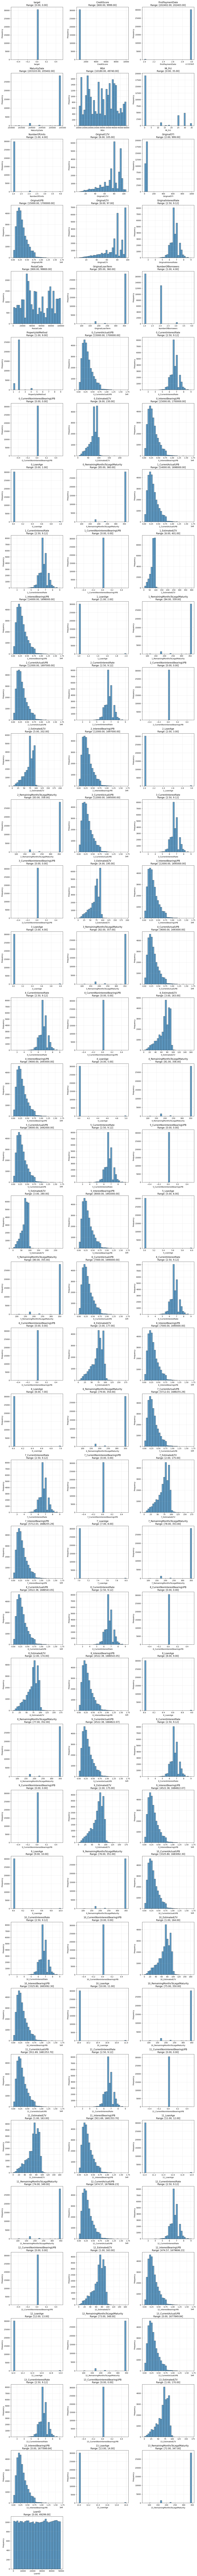

In [ ]:
# Distribution Analysis - Non-Object Type Columns

columns_to_drop = ['index']  # Add columns to exclude from analysis

# Get all columns
all_cols = loans_train.columns.tolist()

# Select only non-object type columns (numerical, datetime, etc.)
non_object_cols = loans_train.select_dtypes(exclude=['object']).columns.tolist()

# Remove columns in the drop list
non_object_cols = [col for col in non_object_cols if col not in columns_to_drop]

print(f"- Total columns: {len(all_cols)}")
print(f"- Non-object type columns: {len(non_object_cols)}")
print(f"- Columns dropped from analysis: {columns_to_drop}")
print(f"- Object type columns (excluded): {len(all_cols) - len(non_object_cols)}")

# Group by data type
data_types = {}
for col in non_object_cols:
    dtype = str(loans_train[col].dtype)
    if dtype not in data_types:
        data_types[dtype] = []
    data_types[dtype].append(col)


# 3. Data range analysis for numerical columns
numerical_cols = loans_train[non_object_cols].select_dtypes(include=[np.number]).columns.tolist()

# 4. Distribution histograms for numerical columns
if len(numerical_cols) > 0:
    print("4. Distribution Histograms for Numerical Columns:")
    
    # Calculate subplot layout
    n_cols = len(numerical_cols)
    n_rows = (n_cols + 2) // 3  # 3 columns per row
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(numerical_cols):
        row = i // 3
        col_idx = i % 3
        
        # Create histogram
        axes[row, col_idx].hist(loans_train[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[row, col_idx].set_title(f'{col}\nRange: [{loans_train[col].min():.2f}, {loans_train[col].max():.2f}]')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Frequency')
        axes[row, col_idx].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(n_cols, n_rows * 3):
        row = i // 3
        col_idx = i % 3
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")


In [ ]:
# Output loans_train static columns and panel columns

print("=== loans_train Column Structure Analysis ===")
print(f"Total columns: {len(loans_train.columns)}")

# Static features (non-time series features)
static_features = [col for col in loans_train.columns 
                   if not col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_')) 
                   and col not in ['index', 'target']]

# Time series features (panel features)
panel_features = [col for col in loans_train.columns 
                  if col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_'))]

# Special columns
special_cols = ['index', 'target']

print("1. Static Features:")
print(f"   Count: {len(static_features)}")
print("   Column names:")
for i, col in enumerate(sorted(static_features), 1):
    print(f"   {i:2d}. {col}")


print("2. Time Series Features (Panel Features):")
print(f"   Count: {len(panel_features)}")
print("   Grouped by time points:")
panel_dict = {}
for col in sorted(panel_features):
    time_point = col.split('_')[0]
    if time_point not in panel_dict:
        panel_dict[time_point] = []
    panel_dict[time_point].append(col)

for time_point in sorted(panel_dict.keys(), key=lambda x: int(x)):
    print(f"   Time point {time_point}:")
    for col in sorted(panel_dict[time_point]):
        feature_name = col.split('_', 1)[1]  # Get feature name
        print(f"     - {feature_name}")

print("3. Special Columns:")
print(f"   Count: {len(special_cols)}")
for i, col in enumerate(special_cols, 1):
    print(f"   {i}. {col}")

print("4. Summary Statistics:")
print(f"   - Static features: {len(static_features)} columns")
print(f"   - Time series features: {len(panel_features)} columns")
print(f"   - Special columns: {len(special_cols)} columns")
print(f"   - Total: {len(static_features) + len(panel_features) + len(special_cols)} columns")
print(f"   - Time points: {len(panel_dict)} (0-{max([int(k) for k in panel_dict.keys()])})")
print(f"   - Features per time point: {len(panel_features) // len(panel_dict)}")


=== loans_train Column Structure Analysis ===
Total columns: 144
1. Static Features:
   Count: 30
   Column names:
    1. BalloonIndicator
    2. Channel
    3. CreditScore
    4. FirstPaymentDate
    5. FirstTimeHomebuyerFlag
    6. InterestOnlyFlag
    7. LoanID
    8. LoanPurpose
    9. MI_Pct
   10. MSA
   11. MaturityDate
   12. NumberOfBorrowers
   13. NumberOfUnits
   14. OccupancyStatus
   15. OriginalCLTV
   16. OriginalDTI
   17. OriginalInterestRate
   18. OriginalLTV
   19. OriginalLoanTerm
   20. OriginalUPB
   21. PPM_Flag
   22. PostalCode
   23. ProductType
   24. ProgramIndicator
   25. PropertyState
   26. PropertyType
   27. PropertyValMethod
   28. SellerName
   29. ServicerName
   30. SuperConformingFlag
2. Time Series Features (Panel Features):
   Count: 112
   Grouped by time points:
   Time point 0:
     - CurrentActualUPB
     - CurrentInterestRate
     - CurrentNonInterestBearingUPB
     - EstimatedLTV
     - InterestBearingUPB
     - LoanAge
     - MonthlyRep